In [1]:
import sys
sys.path.append('/home/spaceswimmer/Documents/NeoGen_Modeling')

In [2]:
from scratch.konutil import *
import segyio
import numpy as np
import multiprocessing as mp
import pykonal
import scipy.spatial
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt

In [3]:
#Open vp segy
dstpath = '../../Data/Meshdurechenskaya/Model_2_3d/Vp 3D Big_tilted_trim.sgy'
src = segyio.open(dstpath, mode='r', endian='big', ignore_geometry=True)
vp = segyio.tools.collect(src.trace[:])
cdpx = []
cdpy = []
# print(cdpx.shape)
for i, th in enumerate(src.header[:]):
    cdpx.append(th[segyio.TraceField.CDP_X])
    cdpy.append(th[segyio.TraceField.CDP_Y])
src.close()
xu = np.unique(cdpx)
yu = np.unique(cdpy)
vp = np.reshape(vp, (yu.size, xu.size, vp.shape[-1])).transpose(1,0,2) #[:,240:351,:]

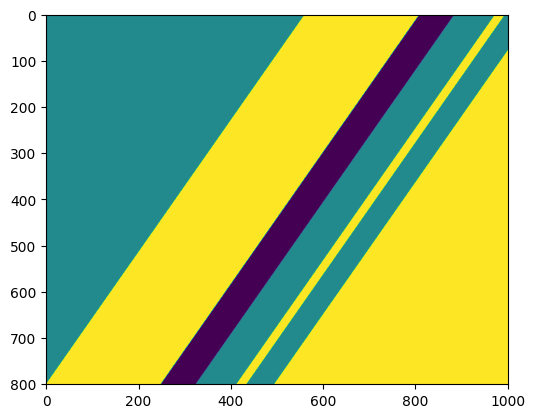

In [4]:
fig, ax = plt.subplots()
ax.imshow(np.flip(vp.transpose((1,0,2))[:,:,40], 0))

In [5]:
nsou = 5*(1000/25+1)
src_coordinates = np.zeros((int(nsou),3))
for i in range(5):
    src_coordinates[i*41:(i+1)*41, 0] = np.arange(2000,3001,25)
    src_coordinates[i*41:(i+1)*41, 1] = 175 + i*50
    src_coordinates[i*41:(i+1)*41, 2] = 0

nrec = 12012
rec_coordinates = np.zeros((int(nrec),3))
for i in range(12):
    rec_coordinates[i*1001:i*1001+1001,0] = np.linspace(0, 5000, 1001)
    rec_coordinates[i*1001:i*1001+1001,1] = i*50
    rec_coordinates[i*1001:i*1001+1001,2] = 0


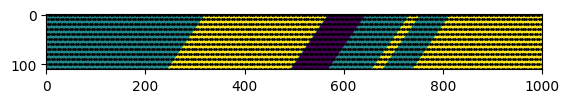

In [6]:
fig, ax = plt.subplots()
ax.imshow(np.flip(vp.transpose((1,0,2))[350:461,:,40], 0))
ax.scatter(rec_coordinates[::5,0]/5, rec_coordinates[::5,1]/5, s=1, c='black')

# Pykonal

In [7]:
vmodel_true = pykonal.fields.ScalarField3D(coord_sys='cartesian')
vmodel_true.min_coords     =   0, 0, 0
vmodel_true.node_intervals =   5,   5, 5
vmodel_true.npts           = 111, 1001, 385
vmodel_true.values = vp.transpose((1,0,2))[350:461,:,:]

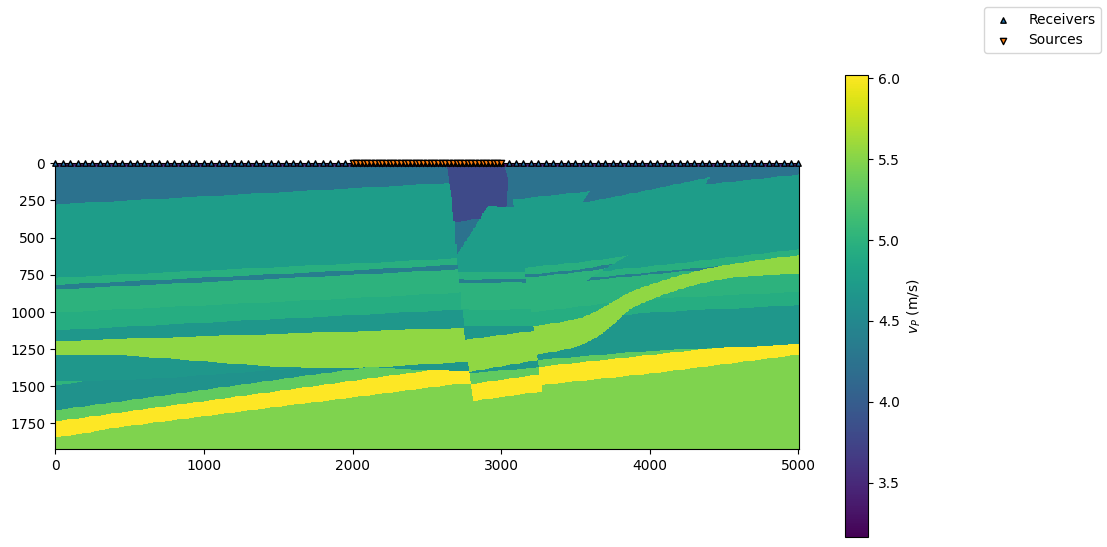

In [23]:
plt.close("all")
fig, ax = plt.subplots(figsize=(12, 6))
qmesh = ax.pcolormesh(
    vmodel_true.nodes[55, :, :, 1],
    vmodel_true.nodes[55, :, :, 2],
    vmodel_true.values[55, :, :]
)
ax.scatter(rec_coordinates[:1001,0][::10], rec_coordinates[:1001,2][::10], marker="^", clip_on=False, s=15, edgecolor="k", zorder=100, label="Receivers")
ax.scatter(src_coordinates[:41,0], src_coordinates[:41,2], marker="v", clip_on=False, s=20, edgecolor="k", zorder=100, label="Sources")
ax.set_aspect(1)
ax.invert_yaxis()
fig.legend()

cbar = fig.colorbar(qmesh, ax=ax)
cbar.set_label("$v_P$ (m/s)")